In [1]:
import logging
import s3fs
import numpy as np
import os.path as op
import os
import nibabel as nib

import AFQ.api as api
import AFQ.viz as viz

/Users/john/opt/miniconda3/envs/afq/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/john/opt/miniconda3/envs/afq/lib/python3.7/site-packages/dipy/stats/__init__.py:7: UserWarning: The `dipy.stats` module is still under heavy development and functionality, as well as the API is likely to change in future versions of the software
  warnings.warn(w_string)


In [2]:
def afq_prek_api(subject):    
    logging.basicConfig(level=logging.INFO)
    log = logging.getLogger(__name__)  

    fs = s3fs.S3FileSystem()
    
    sub_prefix = f"sub-"
        
    dwi_dir = f'prek-diffusion/derivatives/sub-{subject}/dtiInit_ses-pre'
    dmri_prep_dir = op.join(op.expanduser('~'), 'AFQ_data', 'prek-diffusion/dmri_prep')

    prek_fdata_src = op.join(dwi_dir, f"sub-{subject}_ses-pre_acq-b1500_dwi_aligned_trilin.nii.gz")
    prek_fbval_src = op.join(dwi_dir, f"sub-{subject}_ses-pre_acq-b1500_dwi_aligned_trilin.bvals")
    prek_fbvec_src = op.join(dwi_dir, f"sub-{subject}_ses-pre_acq-b1500_dwi_aligned_trilin.bvecs")
    
    prek_fdata = f"{dmri_prep_dir}/sub-{subject}/dtiInit_ses-pre/dwi/dwi_aligned_trilin.nii.gz"
    prek_fbval = f"{dmri_prep_dir}/sub-{subject}/dtiInit_ses-pre/dwi/dwi_aligned_trilin.bvals"
    prek_fbvec = f"{dmri_prep_dir}/sub-{subject}/dtiInit_ses-pre/dwi/dwi_aligned_trilin.bvecs"
    
    fs.get(prek_fdata_src, prek_fdata)
    fs.get(prek_fbval_src, prek_fbval)
    fs.get(prek_fbvec_src, prek_fbvec)

    anat_dir = f'prek-diffusion/derivatives/sub-{subject}/freesurfer/mri'
    fs.get(op.join(anat_dir, f"aparc+aseg.nii.gz"), f"{dmri_prep_dir}/sub-{subject}/dtiInit_ses-pre/anat/aparc+aseg.nii.gz")

    wm_labels=[250, 251, 252, 253, 254, 255, 41, 2, 16, 77]
    b0_threshold = 50

    tracking_params = {"n_seeds": 2, "directions": 'det', "stop_threshold": 0.2}
    segmentation_params = {"prob_threshold": 10, "b0_threshold": b0_threshold}
    clean_params = {"clean_rounds": 1}

    myafq = api.AFQ(dmri_prep_dir,
                    dwi_folder="dwi",
                    dwi_file="dwi*", 
                    anat_folder="anat",
                    wm_labels=wm_labels,
                    use_prealign=False,
                    sub_prefix=sub_prefix,
                    b0_threshold=b0_threshold,

                    tracking_params=tracking_params,
                    segmentation_params=segmentation_params,
                    clean_params=clean_params)

    #myafq.export_rois()
    #myafq.export_registered_b0()
    myafq.export_bundles()
    myafq.combine_profiles()
    return myafq

In [3]:
myafq = afq_prek_api(1110) # make example bundles

INFO:dipy.data.fetcher:Dataset is already in place. If you want to fetch it again please first remove the folder /Users/john/AFQ_data/templates 
INFO:dipy.data.fetcher:Dataset is already in place. If you want to fetch it again please first remove the folder /Users/john/AFQ_data/callosum_templates 
INFO:dipy.data.fetcher:Data size is approximately 70MB
INFO:dipy.data.fetcher:Dataset is already in place. If you want to fetch it again please first remove the folder /Users/john/.dipy/mni_template 
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
INFO:nibabel.global:pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


In [4]:
import struct
tabl20 = ['1F77B4', 'AEC7E8', 'FF7F0E', 'FFBB78', '2CA02C', '98DF8A',
          'D62728', 'FF9896', '9467BD', 'C5B0D5', '8C564B', 'C49C94',
          'E377C2', 'F7B6D2', '7F7F7F', 'C7C7C7', 'BCBD22', 'DBDB8D',
          '17BECF', '9EDAE5'];
tabl20_l = ['2991DB', 'D7E4F4', 'FF9A42', 'FFD6AD', '37C837',
            'BCEAB3', 'DF5353', 'FFC8C7', 'AC8ACC', 'DDD0E6',
            'A96C60', 'D5B9B3', 'ECA2D6', 'FCE3EE', '000999',
            'E0E0E0', 'DCDC38', 'E8E8B5', '30D6E8', 'C7EAF0'];

for i in range(2*len(tabl20)):
    if np.mod(i, 2) == 0: 
        print(struct.unpack('BBB', bytes.fromhex(tabl20[i//2])))
    else:
        print(struct.unpack('BBB', bytes.fromhex(tabl20_l[i//2])))

(31, 119, 180)
(41, 145, 219)
(174, 199, 232)
(215, 228, 244)
(255, 127, 14)
(255, 154, 66)
(255, 187, 120)
(255, 214, 173)
(44, 160, 44)
(55, 200, 55)
(152, 223, 138)
(188, 234, 179)
(214, 39, 40)
(223, 83, 83)
(255, 152, 150)
(255, 200, 199)
(148, 103, 189)
(172, 138, 204)
(197, 176, 213)
(221, 208, 230)
(140, 86, 75)
(169, 108, 96)
(196, 156, 148)
(213, 185, 179)
(227, 119, 194)
(236, 162, 214)
(247, 182, 210)
(252, 227, 238)
(127, 127, 127)
(0, 9, 153)
(199, 199, 199)
(224, 224, 224)
(188, 189, 34)
(220, 220, 56)
(219, 219, 141)
(232, 232, 181)
(23, 190, 207)
(48, 214, 232)
(158, 218, 229)
(199, 234, 240)


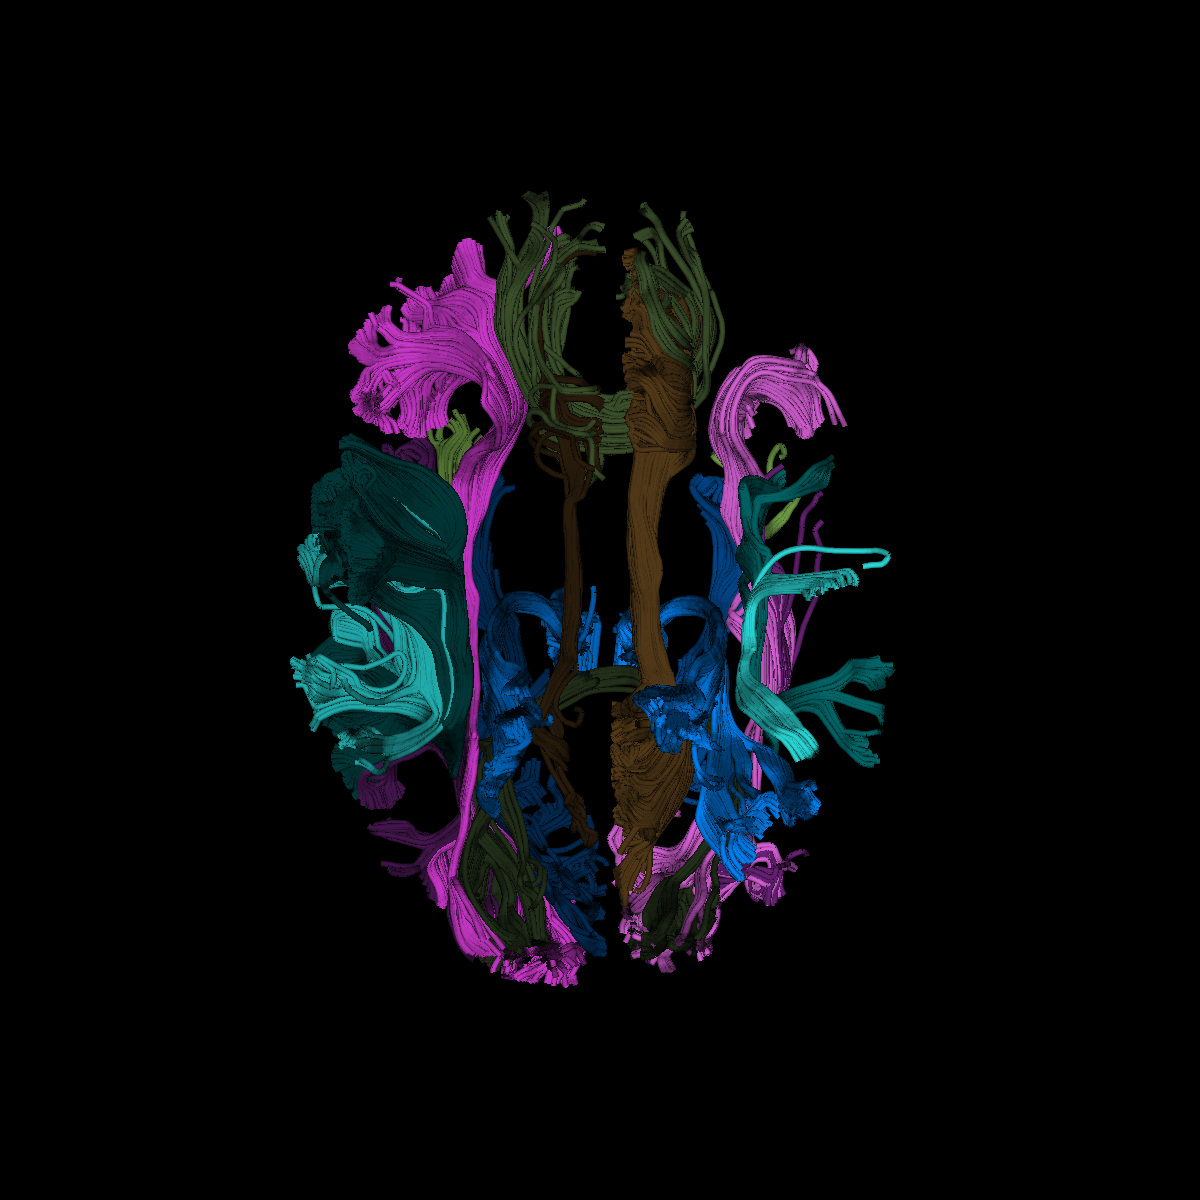

In [8]:
bundles = myafq.get_clean_bundles()[0]
#scene = viz.visualize_bundles(bundles, interact=True)
scene = viz.visualize_bundles(bundles, bundle_names=myafq.bundle_dict, inline=True)

In [6]:
myafq.export_bundle_gif()

In [7]:
myafq.export_ROI_gifs()

No streamlines found for ATR_R
No streamlines found for ATR_L
